# Presenting to the L-Band working Group at Western Snows Conference 2022

## Installation

In [1]:
# !pip install uavsar_pytools

## Creating a Netrc file. 

End user agreement.

In [31]:
from uavsar_pytools.uavsar_tools import create_netrc
create_netrc()

## Basic Usage: You have a url and want to download, unzip, and convert to geotiffs.

In [32]:
from uavsar_pytools.UavsarScene import UavsarScene
directory_to_load = '~/Downloads/uavsar_ex/'
url = 'https://datapool.asf.alaska.edu/INTERFEROMETRY_GRD/UA/ylwstn_26902_09053-000_14110-001_1838d_s01_L090_01_int_grd.zip'
scene = UavsarScene(url = url, work_dir = directory_to_load)
scene.url_to_tiffs()

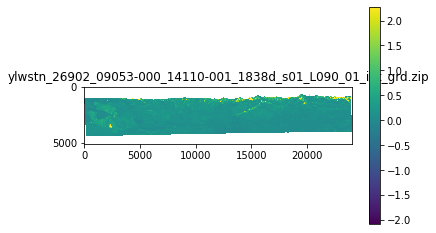

In [25]:
scene.show(2)

In [30]:
import pandas as pd
df = pd.DataFrame(scene.images[0]['description'])
df.to_csv('~/Downloads/uavsar_ex/img_ann.csv')

In [29]:
df

,uavsar rpi annotation file version number,site description,flight plan comments of pass 1,flight plan comments of pass 2,processing comments,url,slant range interferogram,slant range unwrapped phase,slant range correlation,slant range amplitude of pass 1,...,grd_phs.val_maxv,slc_phs.val_mult,slc_phs.val_minv,slc_phs.val_maxv,dsp_cmap,slt_phs.dsp_cmap,grd_phs.dsp_cmap,slc_phs.dsp_cmap,set_hddr,set_tail
value,2,"Yellowstone National Park, WY",N/A,N/A,N/A,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,ylwstn_26902_09053-000_14110-001_1838d_s01_L09...,...,3.14,1.0,-3.14,3.14,grey,cmy,cmy,cmy,0,0
units,-,&,&,&,&,&,&,&,&,&,...,rad,-,rad,rad,&,&,&,&,bytes,bytes
comment,uavsar rpi annotation file version number ...,site description ...,flight plan comments of pass 1 ...,flight plan comments of pass 2 ...,processing comments ...,url ...,file size 374486448 bytes,file size 187243224 bytes,file size 187243224 bytes,file size 187243224 bytes,...,maximum value default for display,maximum value default for display,maximum value default for display,maximum value default for display,default grey color table,color table for interferogram phase,color table for interferogram phase,color table for interferogram phase,header bytes in raw data,tail bytes in raw data


In [27]:
print(scene.images[0]['description']['start time of acquisition for pass 1']['value'])
print(scene.images[0]['description']['start time of acquisition for pass 2']['value'])

31-Jul-2009 19:52:54 UTC
12-Aug-2014 20:04:09 UTC


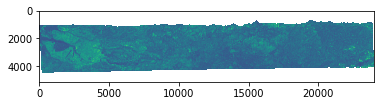

In [28]:
import matplotlib.pyplot as plt
plt.imshow(scene.images[0]['array'].astype(float))

## You have a single image (usually an incidence angle file and want to convert)

In [1]:
from uavsar_pytools.UavsarImage import UavsarImage
inc_url = 'http://uavsar.asfdaac.alaska.edu/UA_lowman_23205_21021_006_210322_L090_CX_01/lowman_23205_21021_006_210322_L090_CX_01.inc'
directory_to_load = '~/Downloads/uavsar_ex/jpl_img'
img = UavsarImage(url = inc_url, work_dir = directory_to_load)
img.url_to_tiff()

/home/zacharykeskinen/anaconda3/envs/play/lib/python3.8/site-packages/uavsar_pytools/UavsarImage.py:82: FutureWarning: elementwise != comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  if self.arr != None:


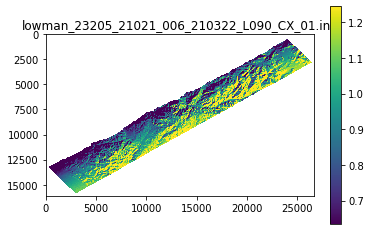

In [3]:
img.show()

## You want to define and search programmatically

In [19]:
# show map
from folium import Map
from folium.plugins import Draw
m = Map()
draw = Draw(export = True, filename = 'asf_wkt.geojson')
draw.add_to(m)
m

In [20]:
import geopandas as gpd
wkt = 'POLYGON((-135.6 58.2 -136.6 58.1 -135.8 56.9 -134.6 56.9 -134.9 58.0 -135.7 58.2))'
wkt = gpd.read_file('~/Downloads/asf_wkt.geojson').to_wkt().loc[0, 'geometry']
print(wkt)

POLYGON ((-476.367188 43.516689, -476.367188 44.824708, -474.543457 44.824708, -474.543457 43.516689, -476.367188 43.516689))


In [28]:
from datetime import datetime
import asf_search as asf
# define search parameters for sierra flight line
start_date = datetime.strptime('2020-02-20 11:00:00', '%Y-%m-%d %H:%M:%S') 
end_date = datetime.strptime('2021-02-21 11:00:00', '%Y-%m-%d %H:%M:%S') 

# search for data
results = asf.search(platform = 'UAVSAR',
                     processingLevel = (['INTERFEROMETRY_GRD']),
                     intersectsWith = wkt,
                     start = start_date,
                     end = end_date)

print(f'{len(results)} product(s) found')

17 product(s) found


In [ ]:
for i in range(len(results)):
    url = results[i].properties['url']
    scene = UavsarScene(url = url, work_dir= './data/imgs/')
    scene.url_to_tiffs()
    print(scene.images[0]['description']['start time of acquisition for pass 1']['value'])
    print(scene.images[0]['description']['start time of acquisition for pass 2']['value'])